## pedestalSubtraction4XtalkCheckのアウトプットから損失率を求める。



***********************
 parameterLabel =  137dC10min
weldDate =  ['2023-11-07-215833', '2023-11-08-124310']
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: L2P2, dtype: float64
2    0.890200
3    0.980545
4    1.070393
5    0.931305
6    1.021095
7    0.979401
8    0.769823
9    0.771833
Name: L2P2, dtype: float64
137dC10min loss = 0.13680036105727134 ± 0.03204419022580539
137dC10min loss = 0.0731756789665512 ± 0.03677093362504336

***********************
 parameterLabel =  150dC3min
weldDate =  ['2023-11-02-191329', '2023-11-03-144727', '2023-11-03-200225', '2023-11-03-221341']


2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: L2P2, dtype: float64
2    0.880971
3    0.886809
4    0.907412
5    0.897814
6    0.829544
7    0.792666
8    0.940653
9    0.996335
Name: L2P2, dtype: float64
150dC3min loss = 0.14600432621918935 ± 0.013249871963599032
150dC3min loss = 0.10847457657805937 ± 0.020869602686613236
2    0.748260
3    0.746306
4    0.793690
5    0.739170
6    0.634079
7    0.568821
8    0.731919
9    0.916716
Name: L2P2, dtype: float64
150dC3min loss = 0.31408132465373695 ± 0.022061162284720784
150dC3min loss = 0.2651298250337606 ± 0.034410321881310144
2    0.670707
3    0.705034
4    0.719664
5    0.662554
6    0.524814
7    0.418262
8    0.535656
9    0.897614
Name: L2P2, dtype: float64
150dC3min loss = 0.4169912892839627 ± 0.03295696148961134
150dC3min loss = 0.35821198807138743 ± 0.04906909535534809

***********************
 parameterLabel =  118dC12h
weldDate =  ['2023-12-19-215846', '2023-12-20-191008']
2    1.0
3    1.0
4 

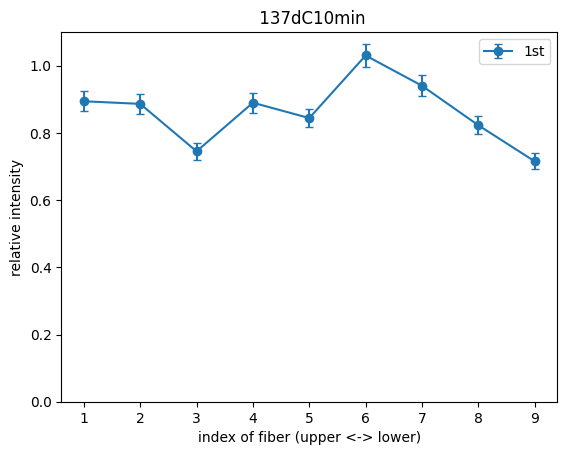

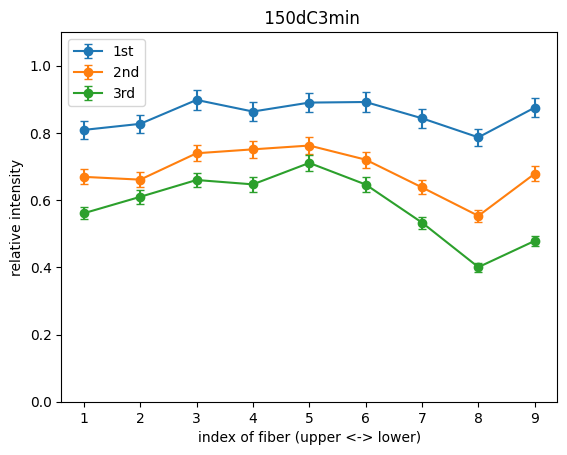

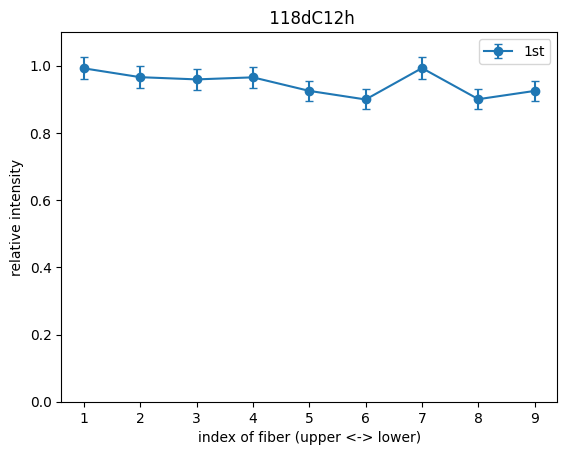

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plotDatasets = [# condition, before, after]
	['137dC10min','2023-11-07-215833','2023-11-08-124310']
	,['150dC3min','2023-11-02-191329','2023-11-03-144727','2023-11-03-200225','2023-11-03-221341']
	,['118dC12h','2023-12-19-215846','2023-12-20-191008']
	]
listDfs1 = [[]for _ in range (len(plotDatasets))]
listDfs2 = [[]for _ in range (len(plotDatasets))]
listDfRatios1=[]
listDfRatios2=[]
channel1=0 # 0:ch1, 1:ch2  
channel2=1 # 0:ch1, 1:ch2  
errRatio_list = [0.0234,0.0173] # from the connector coupling reproducibility
errRatio1 = errRatio_list[channel1%2]
errRatio2 = errRatio_list[channel2%2]

ordering = ['0th','1st','2nd','3rd']

#************************************************
for iParameter, listWelds in enumerate(plotDatasets):
	parameterLabel = listWelds[0]
	weldDate = listWelds[1:]
	nMeasureSample = len(weldDate)
	print("\n***********************\n"
			 ,"parameterLabel = ",parameterLabel)
	print("weldDate = ",weldDate)
	fig, ax = plt.subplots()

	for iweld,date in enumerate(weldDate):
		df1 = pd.read_csv(f'./outputPedestalSubtraction4XtalkCheck/{parameterLabel}/outputPedestalSubtraction4XtalkCheck{date}_ch1.csv')
		df2 = pd.read_csv(f'./outputPedestalSubtraction4XtalkCheck/{parameterLabel}/outputPedestalSubtraction4XtalkCheck{date}_ch2.csv')
		df1.index += 1
		df2.index += 1
		#print(df)
		listDfs1[iParameter].append(df1) #both  before and after are filled.
		listDfs2[iParameter].append(df2) #both  before and after are filled.
		#print(f'listDfs[{iParameter}][{iweld}] = \n',listDfs[iParameter][iweld])
		dfRatio1 = listDfs1[iParameter][iweld]/listDfs1[iParameter][0]
		dfRatio2 = listDfs2[iParameter][iweld]/listDfs2[iParameter][0]
		mean_ratio1 = dfRatio1.mean(numeric_only=True)
		mean_ratio2 = dfRatio2.mean(numeric_only=True)
		listDfRatios1.append(dfRatio1)
		listDfRatios2.append(dfRatio2)
		Loss1 = dfRatio1.iloc[:,channel1]# L1P1 L2P2 L2P1 L1P2
		Loss2 = dfRatio2.iloc[1:,channel2]# L1P1 L2P2 L2P1 L1P2
		print(Loss2)
		sampleSize = len(Loss1)
	#************* plot *************
		x1 = np.arange(len(Loss1))+1
		y1 = Loss1.values.flatten()
		x2 = np.arange(len(Loss2))+1
		y2 = Loss2.values.flatten()

		if(iweld==0):
			continue
		#print("y=", y)
		print(f'{parameterLabel} loss =',1-y1.mean(),"±",y1.std(ddof=1)/np.sqrt(sampleSize))
		print(f'{parameterLabel} loss =',1-y2.mean(),"±",y2.std(ddof=1)/np.sqrt(sampleSize))
		yErr1 = y1*np.sqrt(2)*errRatio1
		yErr2 = y2*np.sqrt(2)*errRatio2
		ax.errorbar(x1, y1, yerr=yErr1 ,fmt='-o'
							 , capsize=3, label=f'{ordering[iweld]}')
		#ax.errorbar(x2, y2, yerr=yErr2 ,fmt='-o'
					  # , capsize=3, label=f'parameterLabel:{iweld} weld L2P2')

		ax.set_title(f' {parameterLabel}')
		ax.set_xlabel('index of fiber (upper <-> lower)')
		ax.set_ylabel('relative intensity')
		ax.set_ylim([0, 1.1])
		ax.legend()
plt.show()
	
#df0 =pd.read_csv()

## Xtalk check


***********************
 parameterLabel =  137dC10min
weldDate =  ['2023-11-07-215833', '2023-11-08-124310']
9
   L1P1  L2P2  L2P1  L1P2
1   1.0   1.0   1.0   1.0
2   1.0   1.0   1.0   1.0
3   1.0   1.0   1.0   1.0
4   1.0   1.0   1.0   1.0
5   1.0   1.0   1.0   1.0
6   1.0   1.0   1.0   1.0
7   1.0   1.0   1.0   1.0
8   1.0   1.0   1.0   1.0
9   1.0   1.0   1.0   1.0
137dC10min loss = 0.0 ± 0.0


ValueError: 'x' and 'y' must have the same size

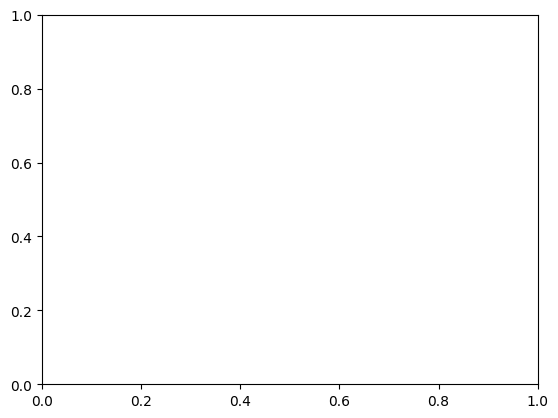